# 1.Framing the problem statement
Here,er are trying to predict whetehr it will rain or not.It is a classification modelling and out target variable is **RAIN**

In [1]:
# loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing dataset
data = pd.read_csv('seattleWeather_1948-2017.csv')

print(data.columns)
print(data.shape)
print(data.head())

# categorical columns:
catCols = data.select_dtypes('object').columns
catCols = list(set(catCols))

# as RAIN is target,remove this
catCols.remove('RAIN')
print('categorical columns:',catCols,len(catCols))

# numerical columns
numCols = data.select_dtypes('number').columns
numCols = list(set(numCols))
print('numerical columns :',numCols,len(numCols))

y = data['RAIN']
# encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(y)
# print(y)

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')
(25551, 5)
         DATE  PRCP  TMAX  TMIN  RAIN
0  1948-01-01  0.47    51    42  True
1  1948-01-02  0.59    45    36  True
2  1948-01-03  0.42    45    35  True
3  1948-01-04  0.31    45    34  True
4  1948-01-05  0.17    45    32  True
categorical columns: ['DATE'] 1
numerical columns : ['TMAX', 'TMIN', 'PRCP'] 3


# 2. Hypothesis Testing:
Null Hypothesis:there is no relationship between target and the predictor
Alternate Hypothesis:there is significant relationship between target and predictor

In [2]:
# we will calculate z-score for numerical columns:
from statsmodels.stats import weightstats as stests
significant_num = []
in_significant_num = []
for i in numCols:
  p_val = stests.ztest(data[i],y)
  p_val = p_val[1]

  print('columns:',i)
  print('p_val:',p_val)

  if p_val < 0.05:
    status = "Reject Null Hypothesis,significant predictor"
    print(status)
    significant_num.append(i)

  else:
    status = "Accept Null Hypothesis,In significant Predictor"
    print(status)
    in_significant_num.append(i)
print('significant columns:',significant_num)
print('in significant columns:',in_significant_num)



columns: TMAX
p_val: 0.0
Reject Null Hypothesis,significant predictor
columns: TMIN
p_val: 0.0
Reject Null Hypothesis,significant predictor
columns: PRCP
p_val: nan
Accept Null Hypothesis,In significant Predictor
significant columns: ['TMAX', 'TMIN']
in significant columns: ['PRCP']


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#3.Exploratory Data Analysis (EDA)

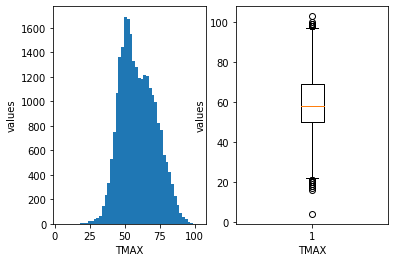

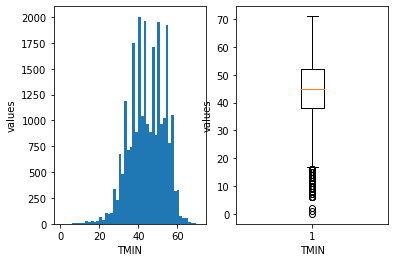

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1239: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1246: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1254: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:1255: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


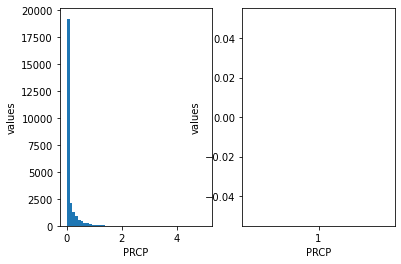

In [3]:
# 1.Univariate analysis of the numerical columns using histogram and boxplot

for i in numCols:
  plt.subplot(1,2,1)
  plt.hist(data[i],bins = 50)
  plt.xlabel(i)
  plt.ylabel('values')

  plt.subplot(1,2,2)
  plt.boxplot(data[i])
  plt.xlabel(i)
  plt.ylabel('values')

  plt.show()


In [4]:
# noted the presence of outliers
# univariate analysis of categorical columns:

for i in catCols:
  print('columns:',i)
  print(data[i].value_counts())

columns: DATE
1995-05-21    1
2013-06-16    1
1973-05-09    1
2004-10-28    1
1956-09-16    1
             ..
1948-01-16    1
1995-08-07    1
1963-06-03    1
1963-11-01    1
2003-03-29    1
Name: DATE, Length: 25551, dtype: int64


          PRCP      TMAX      TMIN
PRCP  1.000000 -0.226736 -0.064365
TMAX -0.226736  1.000000  0.860684
TMIN -0.064365  0.860684  1.000000


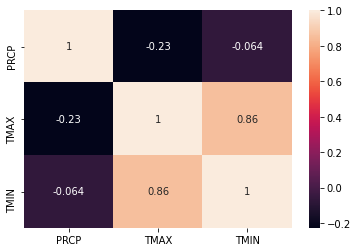

In [5]:
# DATE is unique,so irrelevant for analysis
# 2.Bi - variate analysis of numerical columns
import seaborn as sns
matrix = data.corr()
print(matrix)

sns.heatmap(matrix,annot = True)



# 4.Missing Values


In [6]:
data.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [7]:
# missing value treatment

data.PRCP.fillna(data['PRCP'].median(),inplace = True)
data.RAIN.fillna(data['RAIN'].mode()[0],inplace = True)

In [8]:
data.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

#5. Towards building the model

In [9]:
# X = data.iloc[::-1].values
X=data.iloc[:,:-1]

# # train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state = 0)

In [10]:
# apply robust scaler as there is ouliers in the data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_train.drop('DATE',axis = 1,inplace = True)
X_test.drop('DATE',axis = 1,inplace = True)
x_train= scaler.fit_transform(X_train)
x_test= scaler.transform(X_test)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [11]:
from sklearn import model_selection
from numpy import abs
# from sklearn.metrics import mean_squared_error,mean_absolute_error
# from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

models = []
names = []

models.append(('Logistic Regression',LogisticRegression()))
models.append(('Linear svc',LinearSVC()))
models.append(('Random forest classifier',RandomForestClassifier()))
models.append(('knn ',KNeighborsClassifier()))
models.append(('Guassian NB ',GaussianNB()))
models.append(('Decision TreeClassifier',DecisionTreeClassifier()))

for name,model in models:
  cv_score = model_selection.cross_val_score(model,x_train,y_train,cv = 20,scoring='accuracy')
  cv_score = np.sqrt(np.abs(cv_score))

  
  print("name:--->>",name)
  print("----------------------------------")
  print("CV mean Score :{0},CV min:{1},CV std :{2}".format(np.mean(cv_score),np.min(cv_score),np.std(cv_score)))
  print("----------------------------------")

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


name:--->> Logistic Regression
----------------------------------
CV mean Score :0.9991188344943762,CV min:0.9980411342600799,CV std :0.0005496475373778622
----------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


name:--->> Linear svc
----------------------------------
CV mean Score :0.9999265965211735,CV min:0.9995106434744888,CV std :0.0001747352301489271
----------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


name:--->> Random forest classifier
----------------------------------
CV mean Score :0.9999265965211735,CV min:0.9995106434744888,CV std :0.0001747352301489271
----------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


name:--->> knn 
----------------------------------
CV mean Score :0.9985799181137974,CV min:0.9970602582154803,CV std :0.0007574657240243764
----------------------------------
name:--->> Guassian NB 
----------------------------------
CV mean Score :0.9996566555074343,CV min:0.9941118231997044,CV std :0.0012804658690912798
----------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=20.
  % (min_groups, self.n_splits)), UserWarning)


name:--->> Decision TreeClassifier
----------------------------------
CV mean Score :0.9999265965211735,CV min:0.9995106434744888,CV std :0.0001747352301489271
----------------------------------


In [12]:
# selecting a model
random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(x_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

99.99

In [13]:
# applying ann
# it involves building ann model and training annn model
import tensorflow as tf

ann = tf.keras.models.Sequential()

# adding input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units = 6,activation='relu'))

# adding second hidden layer
ann.add(tf.keras.layers.Dense(units = 6,activation='relu'))


# now adding output layer and as the out put is classifical model,activation function = sigmoid
ann.add(tf.keras.layers.Dense(units=1,activation = 'sigmoid'))

# now training the ann
# first compiling
ann.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics = 'accuracy')

# training ann model
ann.fit(x_train,y_train,batch_size = 32,epochs = 100)




Epoch 1/100
639/639 [==============================] - 1s 840us/step - loss: 0.0974 - accuracy: 0.8946
Epoch 2/100
639/639 [==============================] - 1s 837us/step - loss: 0.0252 - accuracy: 0.9729
Epoch 3/100
639/639 [==============================] - 1s 848us/step - loss: 0.0089 - accuracy: 0.9960
Epoch 4/100
639/639 [==============================] - 1s 837us/step - loss: 0.0031 - accuracy: 0.9998
Epoch 5/100
639/639 [==============================] - 1s 833us/step - loss: 0.0015 - accuracy: 0.9999
Epoch 6/100
639/639 [==============================] - 1s 834us/step - loss: 0.0010 - accuracy: 0.9999
Epoch 7/100
639/639 [==============================] - 1s 837us/step - loss: 8.0921e-04 - accuracy: 0.9999
Epoch 8/100
639/639 [==============================] - 1s 836us/step - loss: 7.1331e-04 - accuracy: 0.9999
Epoch 9/100
639/639 [==============================] - 1s 841us/step - loss: 6.6270e-04 - accuracy: 0.9999
Epoch 10/100
639/639 [==============================] - 1s 82

In [14]:
# # predicting loss on test model
y_pred = ann.predict(x_test,batch_size=32)
y_pred = [ 1 if y>=0.5 else 0 for y in y_pred]

In [15]:
print(y_pred)

[0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 

In [16]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[2975    0]
 [   0 2136]]
1.0
